# Python Final Project

# Economic Visualizations & More

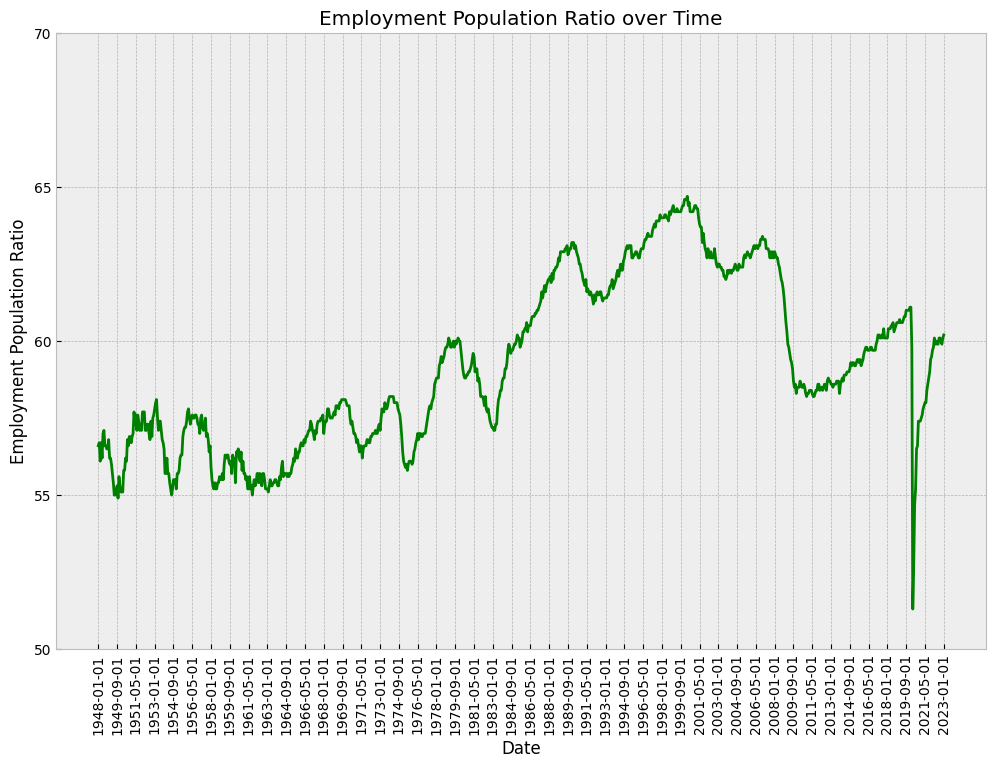

In [ ]:
from pandas.core.window.rolling import WindowingRankType
from IPython.core.history import HistoryAccessorBase
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

df = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=EMRATIO&scale=left&cosd=1948-01-01&coed=2023-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-02-03&revision_date=2023-02-03&nd=1948-01-01')

plt.plot(df['DATE'], df['EMRATIO'], color='green')
plt.xticks(df['DATE'][::20], rotation=90)
plt.yticks([50, 55, 60, 65, 70])
plt.xlabel('Date')
plt.ylabel('Employment Population Ratio')
plt.title('Employment Population Ratio over Time')
plt.show()

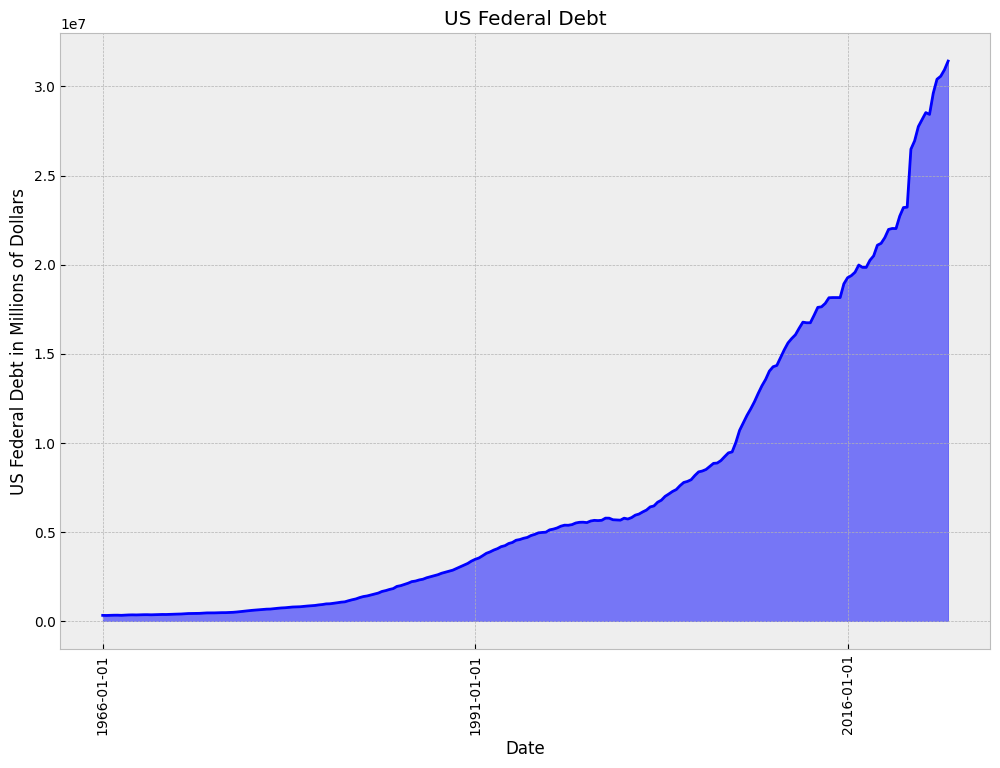

In [ ]:
df = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1138&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GFDEBTN&scale=left&cosd=1966-01-01&coed=2022-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Quarterly%2C%20End%20of%20Period&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-04-12&revision_date=2023-04-12&nd=1966-01-01")

plt.title('US Federal Debt')
plt.plot(df['DATE'], df['GFDEBTN'], color='blue')
plt.xticks(df['DATE'][::100], rotation=90)
plt.fill_between(df['DATE'], df['GFDEBTN'], alpha=.5, color="blue")
plt.xlabel('Date')
plt.ylabel('US Federal Debt in Millions of Dollars')
plt.show()

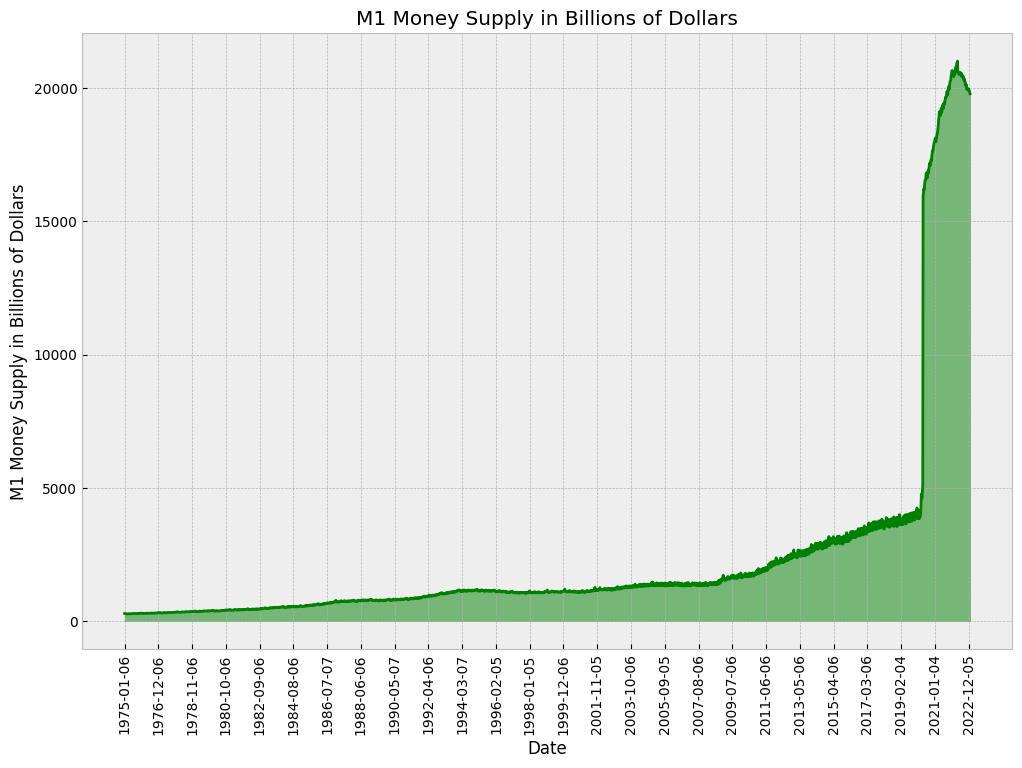

In [ ]:
df = pd.read_csv("https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=WM1NS&scale=left&cosd=1975-01-06&coed=2023-01-02&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Weekly%2C%20Ending%20Monday&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-01-25&revision_date=2023-01-25&nd=1975-01-06")

# Plot the data with an appropriate title
plt.title('M1 Money Supply in Billions of Dollars')
plt.plot(df['DATE'], df['WM1NS'], color='green')
plt.xticks(df['DATE'][::100], rotation=90)
plt.fill_between(df['DATE'], df['WM1NS'], alpha=.5, color='green')
plt.xlabel('Date')
plt.ylabel('M1 Money Supply in Billions of Dollars')
plt.show()

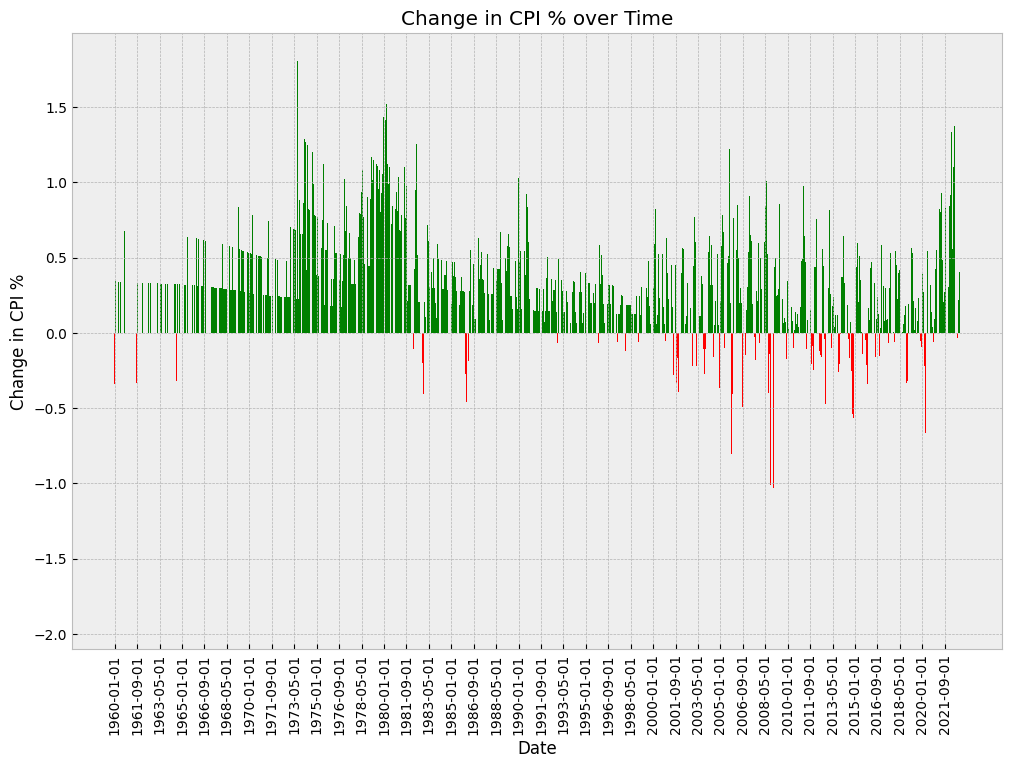

In [ ]:
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CPALTT01USM657N&scale=left&cosd=1960-01-01&coed=2022-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-01-11&revision_date=2023-01-11&nd=1960-01-01'

data = pd.read_csv(url)

# Set colors for positive and negative values
data['color'] = ['green' if x > 0 else 'red' for x in data['CPALTT01USM657N']]

# Plot the data with colors
plt.bar(data['DATE'], data['CPALTT01USM657N'], color=data['color'])
plt.xticks(data['DATE'][::20], rotation=90)
plt.xlabel('Date')
plt.ylabel('Change in CPI %')
plt.title('Change in CPI % over Time')
plt.show()

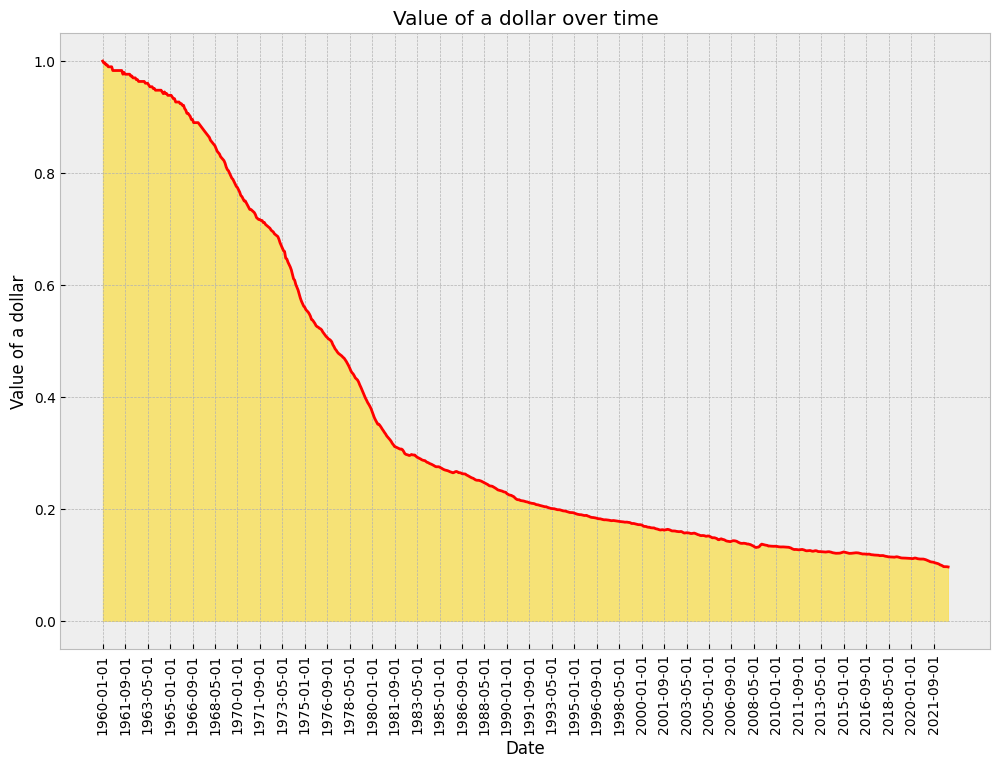

In [ ]:
# Calculate the value of a dollar over time
base_value = 1    # Set the base value of the dollar
data['Dollar_Value'] = base_value

for i in range(1, len(data)):
  data.loc[i, 'Dollar_Value'] = (1 - (data.loc[i, 'CPALTT01USM657N'] / 100)) * data.loc[i-1, 'Dollar_Value']

# Plot the performance of the dollar over the years
plt.plot(data['DATE'], data['Dollar_Value'], color='r')
plt.xticks(data['DATE'][::20], rotation=90)
plt.xlabel('Date')
plt.ylabel('Value of a dollar')
plt.title('Value of a dollar over time')
plt.fill_between(data['DATE'], data['Dollar_Value'], alpha=.5, color='gold')
plt.show()

Time Series Forecasting

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the data
cpi_data = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=CORESTICKM159SFRBATL&scale=left&cosd=1967-12-01&coed=2023-02-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-04-10&revision_date=2023-04-10&nd=1967-12-01')
unemployment_data = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1318&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=UNRATENSA&scale=left&cosd=1948-01-01&coed=2023-03-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2023-04-10&revision_date=2023-04-10&nd=1948-01-01')

In [ ]:
# Define functions for data preprocessing and model fitting
def preprocess_data(cpi_data, unemployment_data):
    """
    Preprocesses the job openings and unemployment data by converting the DATE column to datetime,
    dropping any rows with missing values, and converting the relevant columns to numeric.
    """
    cpi_data['DATE'] = pd.to_datetime(cpi_data['DATE'])
    cpi_data = cpi_data.dropna()
    cpi_data['CORESTICKM159SFRBATL'] = pd.to_numeric(cpi_data['CORESTICKM159SFRBATL'])

    unemployment_data['DATE'] = pd.to_datetime(unemployment_data['DATE'])
    unemployment_data = unemployment_data.dropna()
    unemployment_data['UNRATENSA'] = pd.to_numeric(unemployment_data['UNRATENSA'])

    # Merge the data on DATE
    merged_data = pd.merge(cpi_data, unemployment_data, on='DATE')
    merged_data.set_index('DATE', inplace=True)

    return merged_data

def fit_arima_model(data):
    """
    Fits a SARIMAX model to the preprocessed data and returns the model fit object.
    """
    arima_model = ARIMA(data['UNRATENSA'], exog=data['CORESTICKM159SFRBATL'], order=(1,1,1), seasonal_order=(1,1,1,12))
    arima_model_fit = arima_model.fit()
    return arima_model_fit

In [ ]:
# Preprocess the data
try:
    data = preprocess_data(cpi_data, unemployment_data)
except Exception as e:
    print(f"Error occurred while preprocessing data: {e}")

# Fit a SARIMAX model to the preprocessed data
try:
    arima_model_fit = fit_arima_model(data)
except Exception as e:
    print(f"Error occurred while fitting SARIMAX model: {e}")

# Forecast future unemployment rates
forecast_steps = 24
try:
    forecast_results = arima_model_fit.get_forecast(steps=forecast_steps, exog=cpi_data['CORESTICKM159SFRBATL'][-forecast_steps:], alpha=0.05)
    unemployment_forecast = forecast_results.predicted_mean
    ci_lower = forecast_results.conf_int()['lower UNRATENSA']
    ci_upper = forecast_results.conf_int()['upper UNRATENSA']
except Exception as e:
    print(f"Error occurred while forecasting unemployment rates: {e}")

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Define threshold unemployment rate
threshold = unemployment_forecast.mean() * 1.1

# Determine the best time to switch jobs
if unemployment_forecast.iloc[-1] > threshold:
    switch_jobs = True
    switch_reason = "The forecasted unemployment rate ({:.2f}) is above the threshold ({:.2f}).".format(unemployment_forecast.iloc[-1], threshold)
else:
    switch_jobs = False
    switch_reason = "The forecasted unemployment rate ({:.2f}) is below the threshold ({:.2f}).".format(unemployment_forecast.iloc[-1], threshold)

print(switch_reason)

The forecasted unemployment rate (3.57) is below the threshold (4.39).


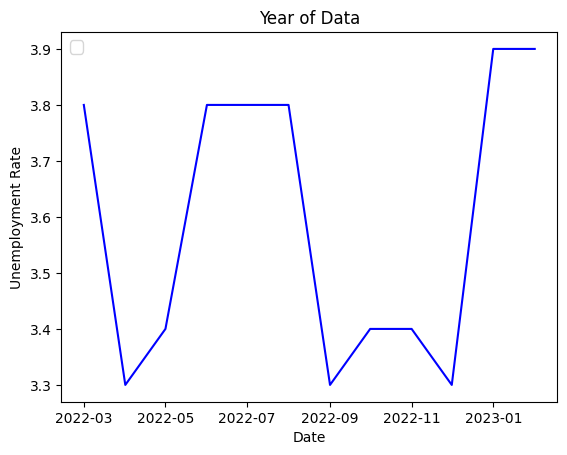

In [ ]:
start_date = '2022-03-01'
end_date = '2023-03-01'

plt.plot(data[start_date:end_date].index, data[start_date:end_date]['UNRATENSA'], color='blue', linestyle='-', label='')

plt.title('Year of Data')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left', fontsize='large')
plt.show()

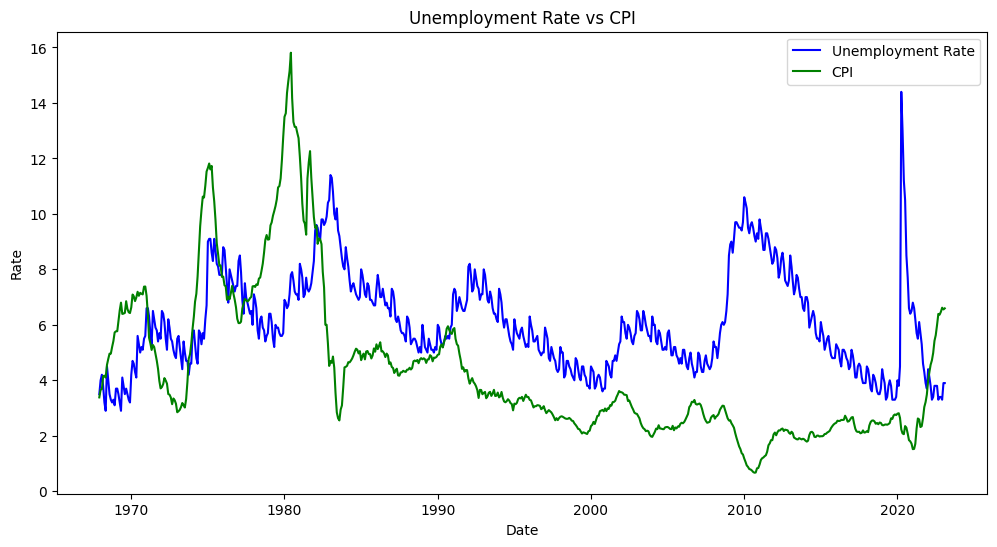

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['UNRATENSA'], color='blue', linestyle='-', label='Unemployment Rate')
plt.plot(data['CORESTICKM159SFRBATL'], color='green', linestyle='-', label='CPI')
plt.title('Unemployment Rate vs CPI')
plt.xlabel('Date')
plt.ylabel('Rate')
plt.legend()
plt.show()

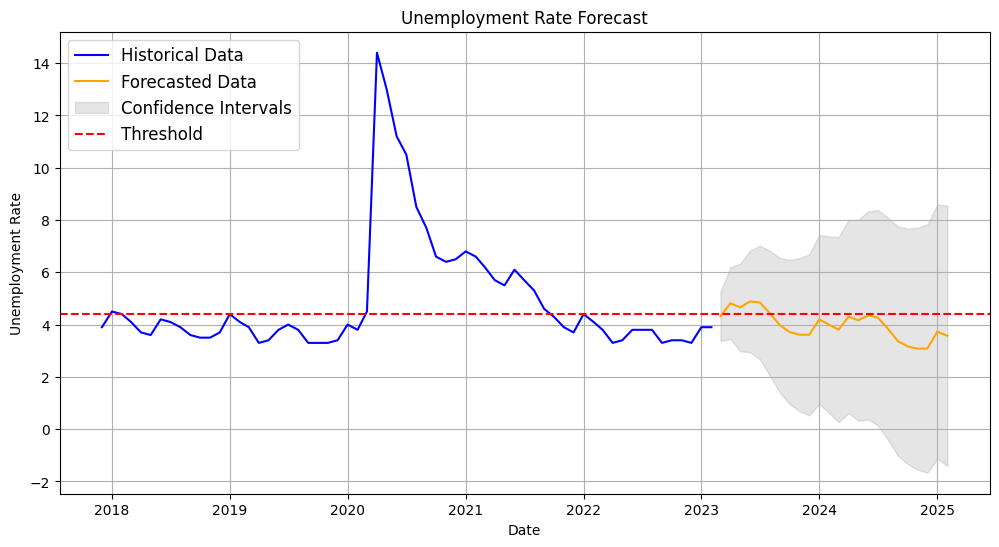

In [ ]:
# Extend the date range for the forecasted data
forecast_dates = pd.date_range(start=unemployment_data['DATE'].iloc[-2], periods=forecast_steps+1, freq='MS')[1:]

plt.figure(figsize=(12,6))
plt.plot(data.index[600:], data['UNRATENSA'][600:], color='blue', linestyle='-', label='Historical Data')
plt.plot(forecast_dates, unemployment_forecast, color='orange', linestyle='-', label='Forecasted Data')
plt.fill_between(ci_lower.index, ci_lower, ci_upper, alpha=0.2, color='gray', label='Confidence Intervals')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.grid(True)
plt.title('Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.legend(loc='upper left', fontsize='large')
plt.show()

In [ ]:
# install yfinance for Yahoo Finance access
!pip install yfinance

import yfinance as yf
import tensorflow as tf

import numpy as np
from IPython.display import Markdown as md

ticker = input('Enter a stock ticker: ')
# Download last year of data for user inputted ticker
data = yf.download(ticker, period='1y')
# Normalize data
matrix = tf.keras.utils.normalize(data.values)
# Create model
model = tf.keras.models.Sequential()
# Add 128 Neuron Layer
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(matrix.shape[1],)))
# Add 64 Neuron Layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
# Add 1 Neuron Layer
model.add(tf.keras.layers.Dense(1))
# Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(matrix, data['Close'], epochs=100)

predicted_prices = model.predict(matrix)
predicted_prices = np.array(predicted_prices).flatten()

mean_predicted_price = np.mean(predicted_prices)

current_price = data['Close'][-1]
change = (mean_predicted_price - current_price) / current_price
percent_change = change * 100

color = 'red'
increase_decrease = 'decrease'

if percent_change >= 0:
  increase_decrease = 'increase'
  color = 'green'

md('<h1>' + ticker + ' Predicted Prices 1 year in the future:</h1><br />' + str(predicted_prices) +
  '<br /><br /><h1>' + ticker + ' Average Predicted Price 1 Year in the Future:<br />&dollar;' + str(mean_predicted_price) +
  '<br /><br />' + ticker + ' Current Price:<br />&dollar;' + str(current_price) +
  '<br /><br />' + ticker + ' Percent Change from Current Price to Average Predicted Price 1 Year in the Future:<br /><font color="' + color + '">' +
  str(percent_change) + '% ' + increase_decrease + '</font></h1>')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enter a stock ticker: ETH-USD
[*********************100%***********************]  1 of 1 completed
Epoch 1/100
12/12 [==============================] - 2s 5ms/step - loss: 2597768.5000
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 2596058.2500
Epoch 3/100
12/12 [==============================] - 0s 10ms/step - loss: 2593885.7500
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 2590532.5000
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 2585407.5000
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 2578077.0000
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 2567713.2500
Epoch 8/100
12/12 [==============================] - 0s 5ms/step - loss: 2553263.0000
Epoch 9/100
12/12 [==============================] - 0s 6ms/step - loss: 2534051.2500
Epoch 10/100
12/12 [=======

<h1>ETH-USD Predicted Prices 1 year in the future:</h1><br />[1571.7424 1571.7424 1571.7424 1571.7424 1571.7424 1571.7424 1571.7424
 1571.7424 1571.7424 1571.7422 1571.7422 1571.7424 1571.7422 1571.742
 1571.742  1571.742  1571.742  1571.742  1571.7422 1571.7422 1571.742
 1571.7422 1571.7422 1571.7422 1571.7422 1571.7426 1571.7424 1571.7422
 1571.7424 1571.7422 1571.7421 1571.7421 1571.742  1571.7424 1571.742
 1571.7422 1571.742  1571.7422 1571.7422 1571.7424 1571.7424 1571.7422
 1571.742  1571.7421 1571.7423 1571.742  1571.742  1571.742  1571.7418
 1571.7418 1571.7418 1571.742  1571.742  1571.742  1571.742  1571.742
 1571.742  1571.742  1571.742  1571.742  1571.742  1571.7421 1571.7421
 1571.7421 1571.742  1571.742  1571.742  1571.7422 1571.7422 1571.742
 1571.742  1571.742  1571.742  1571.742  1571.7422 1571.7422 1571.742
 1571.742  1571.742  1571.742  1571.742  1571.742  1571.742  1571.742
 1571.742  1571.742  1571.742  1571.742  1571.7422 1571.742  1571.742
 1571.742  1571.742  1571.742  1571.7421 1571.7422 1571.7422 1571.7421
 1571.742  1571.742  1571.7422 1571.742  1571.7422 1571.7424 1571.7422
 1571.7422 1571.742  1571.742  1571.7422 1571.7422 1571.7422 1571.742
 1571.7422 1571.742  1571.7422 1571.742  1571.742  1571.7421 1571.742
 1571.742  1571.742  1571.7422 1571.742  1571.742  1571.7422 1571.742
 1571.7421 1571.7421 1571.742  1571.742  1571.7424 1571.7424 1571.7422
 1571.742  1571.742  1571.742  1571.742  1571.7422 1571.7422 1571.742
 1571.742  1571.742  1571.742  1571.742  1571.7422 1571.742  1571.742
 1571.742  1571.742  1571.742  1571.742  1571.7422 1571.7422 1571.742
 1571.742  1571.742  1571.742  1571.742  1571.7424 1571.7423 1571.7422
 1571.7422 1571.7422 1571.7422 1571.7422 1571.7426 1571.7427 1571.7423
 1571.7422 1571.7424 1571.742  1571.7421 1571.7424 1571.7424 1571.7422
 1571.7422 1571.7424 1571.7422 1571.7422 1571.7424 1571.7422 1571.7422
 1571.742  1571.742  1571.742  1571.742  1571.742  1571.7422 1571.742
 1571.7422 1571.7421 1571.7422 1571.742  1571.7423 1571.7422 1571.7422
 1571.7418 1571.7418 1571.742  1571.742  1571.7422 1571.7422 1571.742
 1571.7422 1571.7422 1571.7422 1571.7424 1571.7424 1571.7422 1571.742
 1571.742  1571.7422 1571.7422 1571.7424 1571.7427 1571.7427 1571.7424
 1571.7424 1571.7422 1571.7424 1571.7424 1571.7426 1571.7427 1571.7424
 1571.7427 1571.7424 1571.7424 1571.7426 1571.7432 1571.7432 1571.7427
 1571.7423 1571.7424 1571.7424 1571.7422 1571.7427 1571.743  1571.7427
 1571.7424 1571.7429 1571.7426 1571.7427 1571.7434 1571.7429 1571.7432
 1571.7429 1571.7427 1571.7429 1571.7429 1571.7432 1571.7437 1571.7429
 1571.743  1571.7424 1571.7429 1571.7427 1571.7437 1571.7432 1571.7424
 1571.7426 1571.7424 1571.7422 1571.7424 1571.742  1571.7426 1571.7424
 1571.7424 1571.7423 1571.7427 1571.7424 1571.7424 1571.7424 1571.7424
 1571.7424 1571.7423 1571.7424 1571.7424 1571.7427 1571.7424 1571.7424
 1571.7427 1571.7424 1571.7424 1571.7424 1571.7429 1571.7427 1571.7427
 1571.7424 1571.7424 1571.7424 1571.7424 1571.7429 1571.7429 1571.7424
 1571.7424 1571.7424 1571.7422 1571.7424 1571.7429 1571.7427 1571.7426
 1571.7424 1571.7424 1571.7424 1571.7424 1571.7429 1571.7429 1571.7426
 1571.7427 1571.7424 1571.7427 1571.7424 1571.743  1571.7429 1571.7429
 1571.7426 1571.7424 1571.7424 1571.7422 1571.7421 1571.7422 1571.7422
 1571.7422 1571.7422 1571.7424 1571.7422 1571.7424 1571.7424 1571.7424
 1571.7424 1571.7422 1571.7424 1571.7424 1571.7427 1571.7427 1571.7424
 1571.7424 1571.7424 1571.7424 1571.7424 1571.7429 1571.7429 1571.7424
 1571.7424 1571.7424 1571.7426 1571.7426 1571.7432 1571.7429 1571.7426
 1571.7426 1571.7424 1571.7424 1571.7422 1571.7427 1571.7427 1571.7424
 1571.7426 1571.7422 1571.7424 1571.7424 1571.7427 1571.7429 1571.7424
 1571.7424 1571.7423]<br /><br /><h1>ETH-USD Average Predicted Price 1 Year in the Future:<br />&dollar;1571.7424<br /><br />ETH-USD Current Price:<br />&dollar;1953.17919921875<br /><br />ETH-USD Percent Change from Current Price to Average Predicted Price 1 Year in the Future:<br /><font color="red">-19.529020569679194% decrease</font></h1>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 680, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/logging.py", line 29, in <module>
    from pip._internal.utils.misc import ensure_dir
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/utils/misc.py", line 42, in <module>
    from pip._internal.exceptions import CommandError, ExternallyManagedEnvironment
  File "/usr/local/lib/python3.9/dist-packages/pip/_internal/exceptions.py", line 18, in <module>
    from pip._vendor.requests.models import Request, Response
  File "/usr/local/lib/python3.9/dist-packages/pip/_vendor/requests/__init__.py", line 43, in <module>
    from pip._vendor import urllib3
  File "/us

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

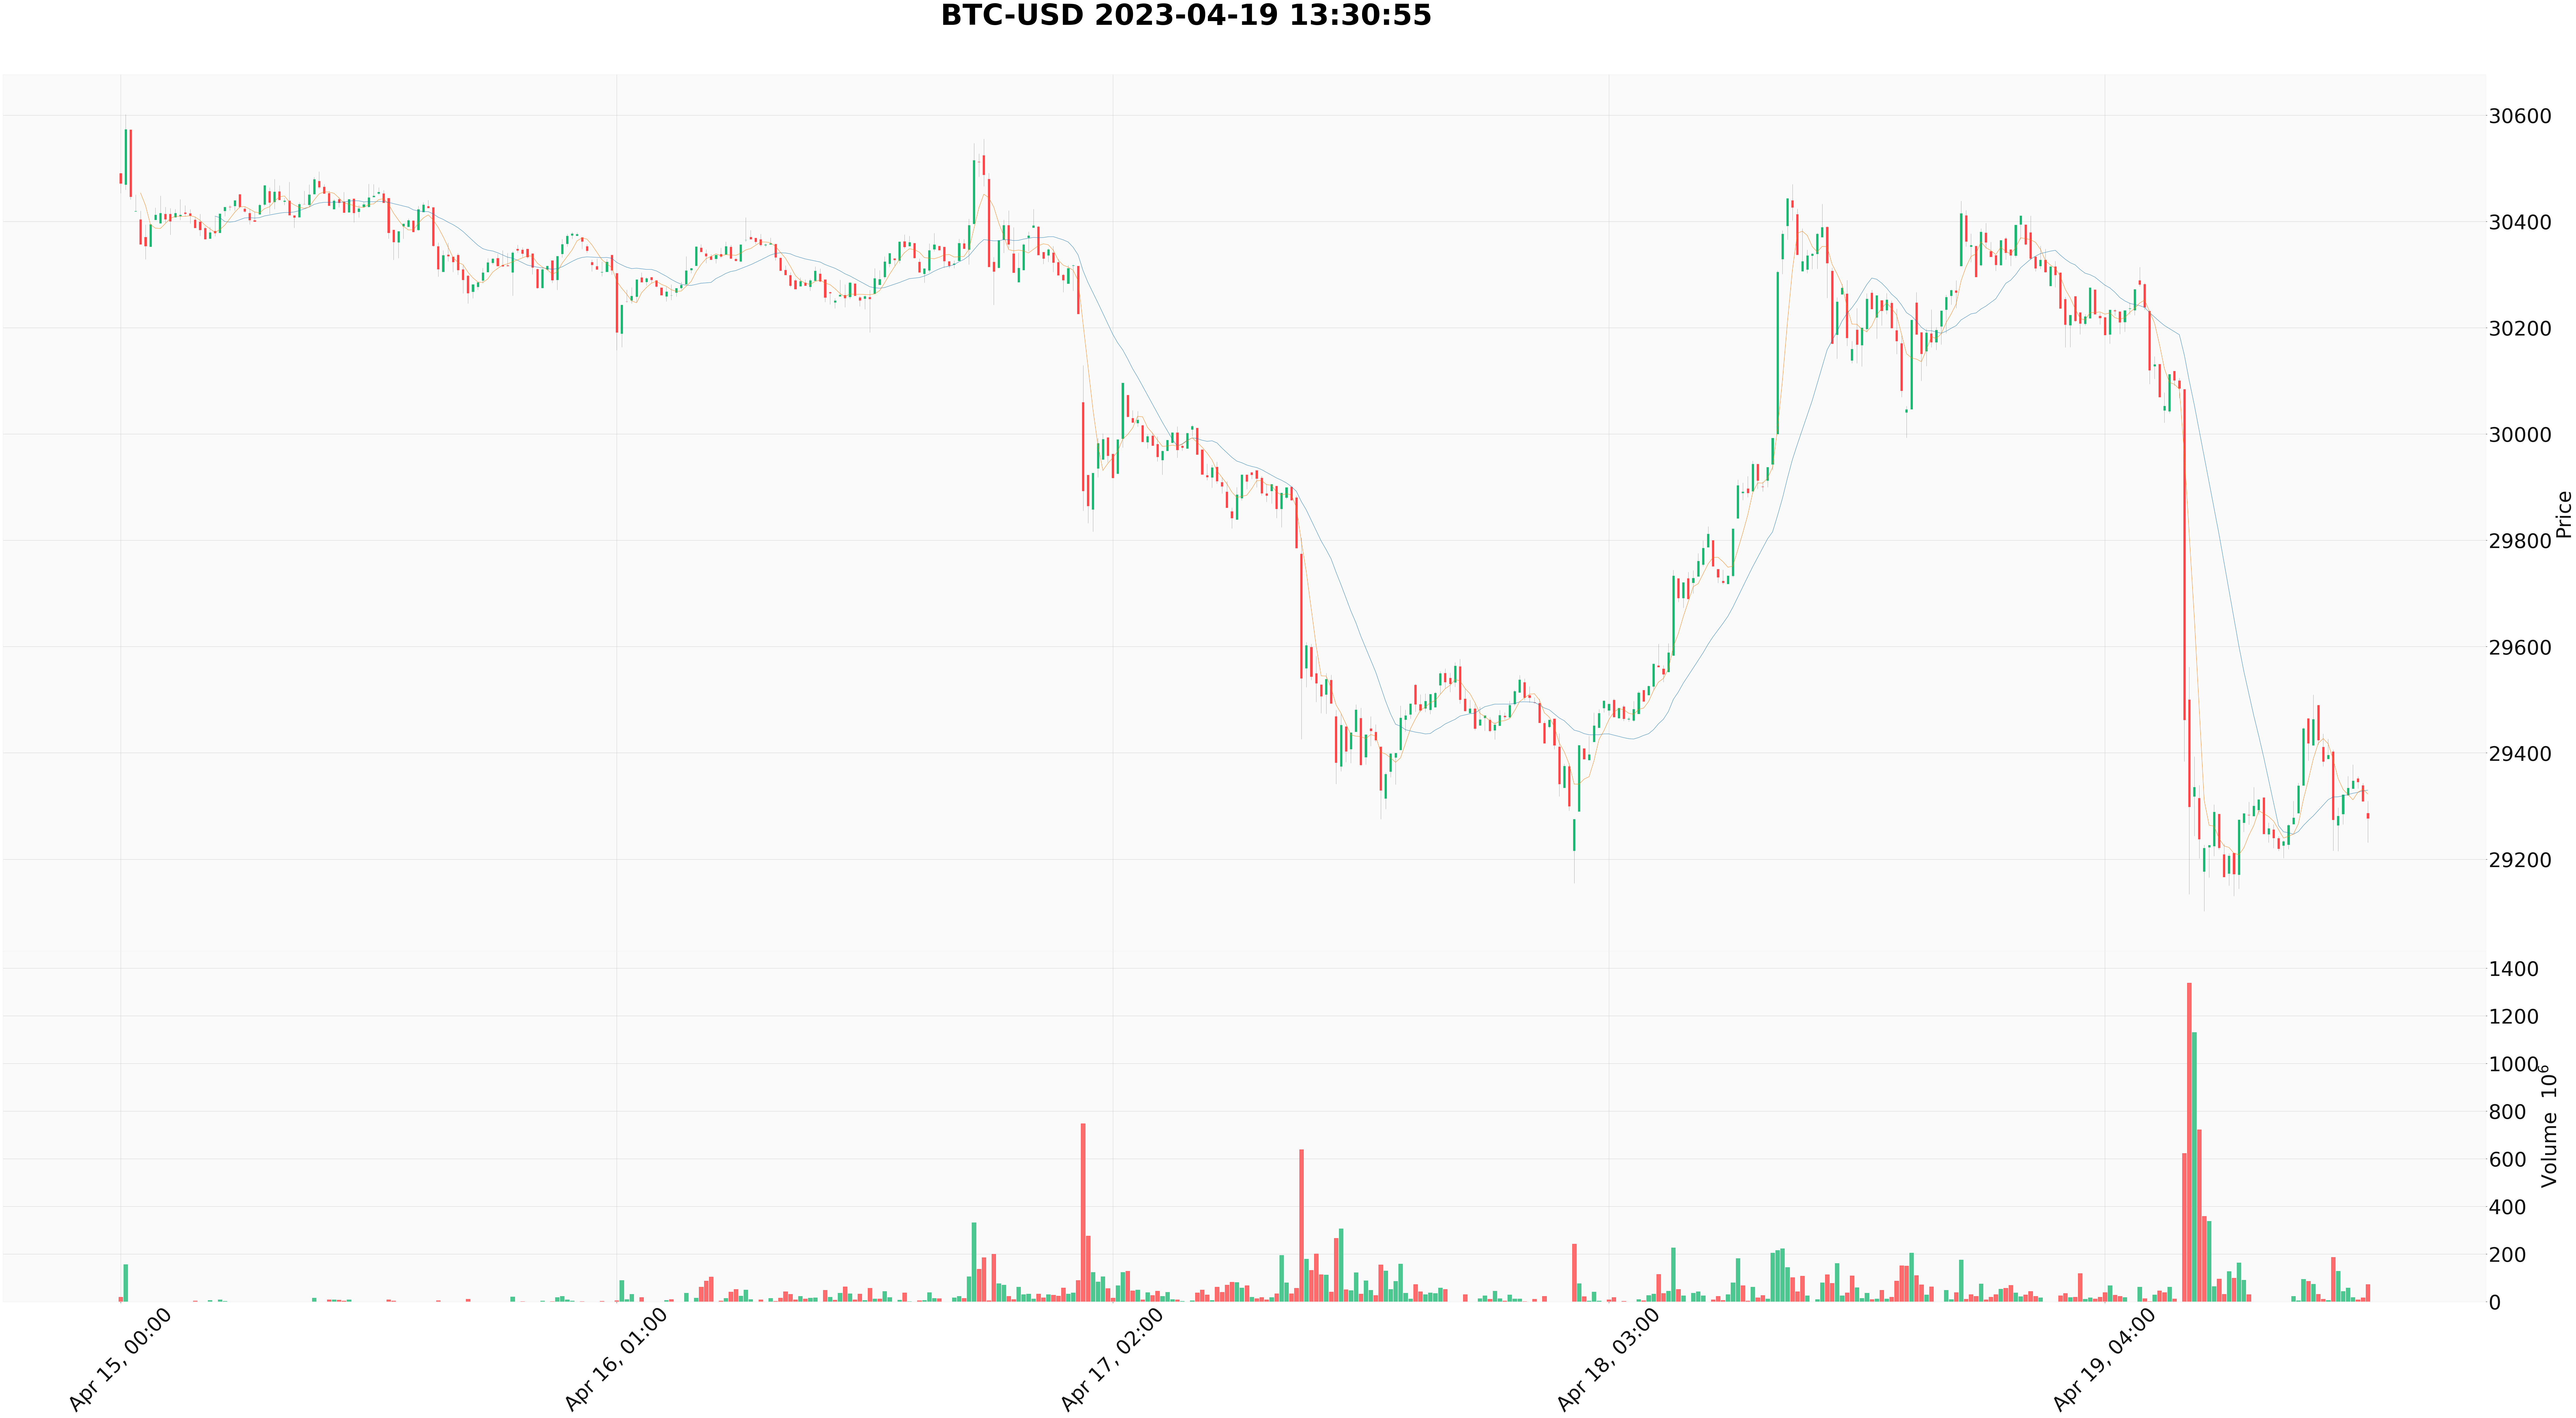

In [ ]:
# starting point: https://deephaven.io/blog/2022/04/25/yfinance/

# imports and installs
!pip install yfinance
!pip install mplfinance
import datetime
import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
from google.colab import files
from pytz import timezone

eastern = timezone('US/Eastern')

style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'font.size': 50})

# valid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
period = input('Enter a time period:\nValid periods: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max\n')

# valid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
interval = input('Enter an interval:\nValid intervals: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo\n')

# the stocks you want to plot
stocks = input('Enter a ticker or list of tickers seperated by commas with no spaces:\n').split(',')

# method to grab data and plot the data
def plot_stocks_df(stocks, period=period , interval=interval):
  for stock in stocks:
    hist = yf.download(tickers=stock, period=period, interval=interval)
    fname = stock + '.pdf'
    fig1, _ = mpf.plot(hist,
      type='candle',
      style=style,
      figsize =(100,50), 
      volume=True,
      mav=(20,5),
      axisoff=False,
      title = stock+" "+datetime.datetime.now(eastern).strftime("%Y-%m-%d %H:%M:%S"),
      returnfig=True,
      scale_padding=0.5)
    
    fig1.savefig(fname,dpi=100)
    files.download(fname)

# call the method
plot_stocks_df(stocks, period, interval)

In [ ]:
!pip install yfinance

import yfinance as yf
import tensorflow as tf
import numpy as np
import pandas as pd

results = []

# Next, we will load the tickers from the CSV file
tickers = pd.read_csv("https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv")
sp500 = tickers['Symbol']

# download the data 
for ticker in sp500:
  ticker = ticker.replace('.', '-')
  data = yf.download(ticker, period='1y')
  # process data into a matrix
  matrix = tf.keras.utils.normalize(data.values)

  # create the model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(matrix.shape[1],)))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

  # train the model
  model.fit(matrix, data['Close'], epochs=100)

  # predict future prices
  predicted_prices = model.predict(matrix)
  predicted_prices = np.array(predicted_prices).flatten()

  mean_predicted_price = np.mean(predicted_prices)

  # calculate percent change
  current_price = data['Close'][-1]
  change = (mean_predicted_price - current_price) / current_price
  percent_change = change * 100

  results.append(percent_change)
  print(ticker + ': ' + str(percent_change) + '%')

resultsDict = {sp500[i]: results[i] for i in range(len(sp500))}
print(sorted(((v, k) for k, v in resultsDict.items()), reverse=True))

best = max(results)
print(str(sp500[results.index(best)]) + ' : ' + str(best) + '%')

Streaming output truncated to the last 5000 lines.
Epoch 39/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4484
Epoch 40/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4259
Epoch 41/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4577
Epoch 42/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4600
Epoch 43/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4646
Epoch 44/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4777
Epoch 45/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4911
Epoch 46/100
8/8 [==============================] - 0s 4ms/step - loss: 53.5065
Epoch 47/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4522
Epoch 48/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4651
Epoch 49/100
8/8 [==============================] - 0s 4ms/step - loss: 53.4518
Epoch 50/100
8/8 [==============================] - 0s 3ms/step - los

In [ ]:
!pip install yfinance

import yfinance as yf
import tensorflow as tf
import numpy as np
import pandas as pd

results = []

tickers = pd.read_csv('https://gist.githubusercontent.com/dibend/2b2ebcca797997be17a2a07b5ffc644d/raw/af2ae5dda25f433933074a61e35209e88ae3ce53/Nasdaq_100.csv')
nasdaq100 = tickers['Symbol']

for ticker in nasdaq100:
  ticker = ticker.replace('.', '-')
  data = yf.download(ticker, period='1y')
  matrix = tf.keras.utils.normalize(data.values)

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(matrix.shape[1],)))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

  model.fit(matrix, data['Close'], epochs=100)

  predicted_prices = model.predict(matrix)
  predicted_prices = np.array(predicted_prices).flatten()

  mean_predicted_price = np.mean(predicted_prices)

   current_price = data['Close'][-1]
  change = (mean_predicted_price - current_price) / current_price
  percent_change = change * 100

  results.append(percent_change)
  print(ticker + ': ' + str(percent_change) + '%')

resultsDict = {nasdaq100[i]: results[i] for i in range(len(nasdaq100))}
print(sorted(((v, k) for k, v in resultsDict.items()), reverse=True))

best = max(results)
print(str(nasdaq100[results.index(best)]) + ' : ' + str(best) + '%')

Streaming output truncated to the last 5000 lines.
Epoch 39/100
8/8 [==============================] - 0s 3ms/step - loss: 480.9613
Epoch 40/100
8/8 [==============================] - 0s 4ms/step - loss: 478.6678
Epoch 41/100
8/8 [==============================] - 0s 4ms/step - loss: 478.7105
Epoch 42/100
8/8 [==============================] - 0s 4ms/step - loss: 478.8041
Epoch 43/100
8/8 [==============================] - 0s 4ms/step - loss: 478.8495
Epoch 44/100
8/8 [==============================] - 0s 3ms/step - loss: 478.8612
Epoch 45/100
8/8 [==============================] - 0s 4ms/step - loss: 478.7744
Epoch 46/100
8/8 [==============================] - 0s 5ms/step - loss: 479.2697
Epoch 47/100
8/8 [==============================] - 0s 4ms/step - loss: 478.6194
Epoch 48/100
8/8 [==============================] - 0s 4ms/step - loss: 478.6102
Epoch 49/100
8/8 [==============================] - 0s 3ms/step - loss: 478.6765
Epoch 50/100
8/8 [==============================] - 0s 4ms